In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from rfpimp import permutation_importances
from sklearn.metrics import mean_squared_error


In [41]:
# Reading dataset into pandas
dbpedia = pd.read_csv("ch6_cell28_dev_feat1_filtered.tsv",sep='\t')

In [42]:
# Checking the first 5 records of dataset
dbpedia.head()

,name,rel#count,http://dbpedia.org/ontology/area#1,http://dbpedia.org/ontology/areaCode#count,http://dbpedia.org/ontology/areaLand#count,http://dbpedia.org/ontology/areaLand#1,http://dbpedia.org/ontology/areaLand#2,http://dbpedia.org/ontology/areaTotal#count,http://dbpedia.org/ontology/areaTotal#1,http://dbpedia.org/ontology/areaWater#count,...,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/History_of_Hamburg>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/List_of_people_from_Bolton>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/List_of_educational_institutions>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/History_of_local_government>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/Hainan>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@OTHER,http://xmlns.com/foaf/0.1/homepage#count,http://xmlns.com/foaf/0.1/name#count,http://xmlns.com/foaf/0.1/nick#count,population
0,<http://dbpedia.org/resource/Ankara>,2.856124,0.0,0.30103,0.000000,0.0,0.000000e+00,0.301030,2.452100e+10,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.477121,0.30103,0.30103,6.661582
1,<http://dbpedia.org/resource/Amsterdam>,3.358316,0.0,0.30103,0.301030,165760000.0,0.000000e+00,0.301030,2.193200e+08,0.301030,...,0.0,0.0,0.0,0.0,0.0,1.0,0.301030,0.30103,0.30103,5.925489
2,<http://dbpedia.org/resource/Aarhus>,2.561101,0.0,0.30103,0.000000,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.301030,0.30103,0.00000,5.422780
3,<http://dbpedia.org/resource/Adelaide>,2.955207,0.0,0.00000,0.000000,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.30103,0.00000,6.119513
4,"<http://dbpedia.org/resource/Ames,_Iowa>",2.082785,0.0,0.00000,0.477121,62700000.0,6.270361e+07,0.477121,6.286000e+07,0.477121,...,0.0,0.0,0.0,0.0,0.0,1.0,0.301030,0.30103,0.00000,4.770594


In [43]:
# Check if there are any null values in any of the columns
dbpedia.columns[dbpedia.isnull().any()].tolist()

[]

In [44]:
# Splitting data set into train and test
train, test = train_test_split(dbpedia, test_size=0.2, random_state=1)
X_train, y_train = train.iloc[:, 1:-1], train.iloc[:, -1]
X_test, y_test = test.iloc[:, 1:-1], test.iloc[:, -1]
feature_names = list(X_train)
# Scaling values using minmax scaler
scaler = MinMaxScaler()
X_train = pd.DataFrame(data=scaler.fit_transform(X_train), columns=feature_names)
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=feature_names)

In [45]:
# Checking the head of the training set
X_train.head()

,rel#count,http://dbpedia.org/ontology/area#1,http://dbpedia.org/ontology/areaCode#count,http://dbpedia.org/ontology/areaLand#count,http://dbpedia.org/ontology/areaLand#1,http://dbpedia.org/ontology/areaLand#2,http://dbpedia.org/ontology/areaTotal#count,http://dbpedia.org/ontology/areaTotal#1,http://dbpedia.org/ontology/areaWater#count,http://dbpedia.org/ontology/areaWater#1,...,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/Egypt>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/History_of_Hamburg>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/List_of_people_from_Bolton>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/List_of_educational_institutions>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/History_of_local_government>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/Hainan>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@OTHER,http://xmlns.com/foaf/0.1/homepage#count,http://xmlns.com/foaf/0.1/name#count,http://xmlns.com/foaf/0.1/nick#count
0,0.179092,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.430677,0.386853,0.0
1,0.208287,0.001720,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.386853,0.0
2,0.167368,0.000000,0.0,0.0,0.0,0.0,0.63093,0.000157,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.386853,0.0
3,0.101962,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.386853,0.0
4,0.199380,0.000471,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.386853,0.0


In [52]:
# Doing a random forest model and then print the R2 score for training, validaton and oob sets
rf = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
rf.fit(X_train, y_train)
print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(rf.score(X_train, y_train), 
                                                                                             rf.oob_score_,
                                                                                             rf.score(X_test, y_test)))
y_pred = rf.predict(X_test)
print('Mean Sqaured Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Sqaured Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

R^2 Training Score: 0.96 
OOB Score: 0.79 
R^2 Validation Score: 0.80
Mean Sqaured Error: 0.09506792899098258
Root Mean Sqaured Error: 0.30833087583143953


In [53]:
# Identifying feature importance using scikit learn implementation. 
import_df = pd.DataFrame({'feature_names': feature_names,'importance': rf.feature_importances_})
import_df = import_df.sort_values(by=['importance'], ascending=False)
import_df.head()

,feature_names,importance
10,http://dbpedia.org/ontology/birthPlace?inv#count,0.238212
7,http://dbpedia.org/ontology/areaTotal#1,0.115891
33,http://dbpedia.org/ontology/country#1@OTHER,0.096832
17,http://dbpedia.org/ontology/country#1@<http://...,0.065200
252,http://dbpedia.org/ontology/timeZone#1@<http:/...,0.046825


In [54]:
# Identifying importance of features using permutation importance as described in assignment
def r2(rf, X_train, y_train):
    return r2_score(y_train, rf.predict(X_train))

perm_imp_rfpimp = permutation_importances(rf, X_train, y_train, r2)

In [55]:
perm_imp_rfpimp = perm_imp_rfpimp.sort_values(by=['Importance'], ascending=False)
perm_imp_rfpimp
# It can be noted that both permutation importance and scikit learn produced importance has slight differences.
# However the most important feature remain the same.Doing permutation importance is costly

,Importance
Feature,
http://dbpedia.org/ontology/birthPlace?inv#count,0.296318
http://dbpedia.org/ontology/country#1@OTHER,0.281986
http://dbpedia.org/ontology/areaTotal#1,0.241520
http://dbpedia.org/ontology/country#1@<http://dbpedia.org/resource/India>,0.184128
rel#count,0.114807
...,...
http://dbpedia.org/ontology/department#1@<http://dbpedia.org/resource/Allier>,-0.000002
http://dbpedia.org/ontology/department#1@<http://dbpedia.org/resource/Loire-Atlantique>,-0.000003
http://dbpedia.org/ontology/region#1@<http://dbpedia.org/resource/Pardubice_Region>,-0.000006


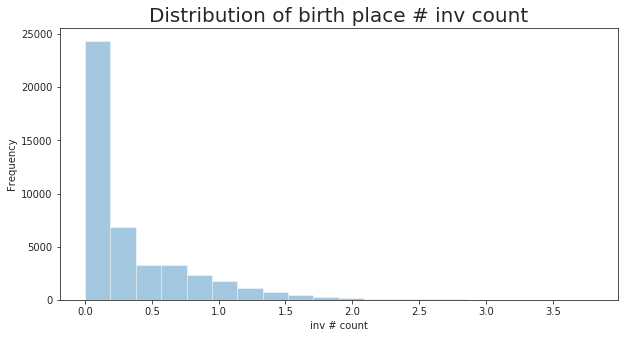

In [56]:
# Plotting histograms for the most important feature
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("white",{'xtick.bottom': True,'ytick.left': True})
fig,ax = plt.subplots(figsize=(10,5))
ax = sns.distplot(dbpedia["http://dbpedia.org/ontology/birthPlace?inv#count"],bins=20,kde=False, rug=False)
ax.set_title("Distribution of birth place # inv count",fontsize=20)
ax.set(ylabel='Frequency')
ax.set(xlabel='inv # count')
plt.show();

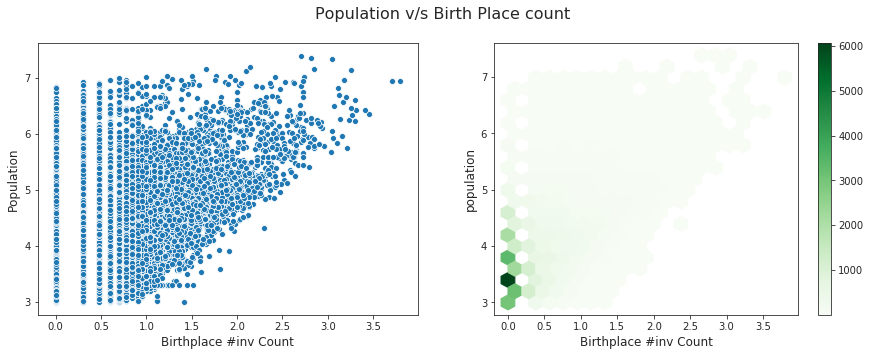

In [57]:
# Scatter plot and hexbin plot to see more clear picture of values
import matplotlib.pyplot as plt
import seaborn as sns

#Setting plot styles
sns.set_style("white",{'xtick.bottom': True,'ytick.left': True})
fig, axs = plt.subplots(1,2,figsize=(15,5))
fig.suptitle("Population v/s Birth Place count", fontsize=16)

#Scatter Plot for data points
figr1 = sns.scatterplot(x='http://dbpedia.org/ontology/birthPlace?inv#count', y='population', data=dbpedia,ax=axs[0])
figr1.axes.set_xlabel("Birthplace #inv Count",fontsize=12)
figr1.axes.set_ylabel("Population",fontsize=12)

#Hexbin plot for datapoints
figr2 = plt.hexbin(dbpedia['http://dbpedia.org/ontology/birthPlace?inv#count'], dbpedia["population"],cmap=plt.cm.Greens, gridsize=20,mincnt=1)
figr2.axes.set_xlabel("Birthplace #inv Count",fontsize=12)
figr2.axes.set_ylabel("population",fontsize=12)
plt.colorbar()

## Thresholding Process using Winsorize method starts here

In [58]:
from scipy.stats.mstats import winsorize
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import HTML

In [59]:
# Using Winsorize method to do binning of features. Two bins where created using 65th percentile.
#limit = 0.10
winsorized_d = dbpedia.copy()
winsorized_d['Birthcount'] = winsorize(dbpedia['http://dbpedia.org/ontology/birthPlace?inv#count'],
limits=[0.0,0.35])
winsorized_d.head()

,name,rel#count,http://dbpedia.org/ontology/area#1,http://dbpedia.org/ontology/areaCode#count,http://dbpedia.org/ontology/areaLand#count,http://dbpedia.org/ontology/areaLand#1,http://dbpedia.org/ontology/areaLand#2,http://dbpedia.org/ontology/areaTotal#count,http://dbpedia.org/ontology/areaTotal#1,http://dbpedia.org/ontology/areaWater#count,...,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/List_of_people_from_Bolton>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/List_of_educational_institutions>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/History_of_local_government>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/Hainan>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@OTHER,http://xmlns.com/foaf/0.1/homepage#count,http://xmlns.com/foaf/0.1/name#count,http://xmlns.com/foaf/0.1/nick#count,population,Birthcount
0,<http://dbpedia.org/resource/Ankara>,2.856124,0.0,0.30103,0.000000,0.0,0.000000e+00,0.301030,2.452100e+10,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.477121,0.30103,0.30103,6.661582,0.30103
1,<http://dbpedia.org/resource/Amsterdam>,3.358316,0.0,0.30103,0.301030,165760000.0,0.000000e+00,0.301030,2.193200e+08,0.301030,...,0.0,0.0,0.0,0.0,1.0,0.301030,0.30103,0.30103,5.925489,0.30103
2,<http://dbpedia.org/resource/Aarhus>,2.561101,0.0,0.30103,0.000000,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.301030,0.30103,0.00000,5.422780,0.30103
3,<http://dbpedia.org/resource/Adelaide>,2.955207,0.0,0.00000,0.000000,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.000000,0.30103,0.00000,6.119513,0.30103
4,"<http://dbpedia.org/resource/Ames,_Iowa>",2.082785,0.0,0.00000,0.477121,62700000.0,6.270361e+07,0.477121,6.286000e+07,0.477121,...,0.0,0.0,0.0,0.0,1.0,0.301030,0.30103,0.00000,4.770594,0.30103


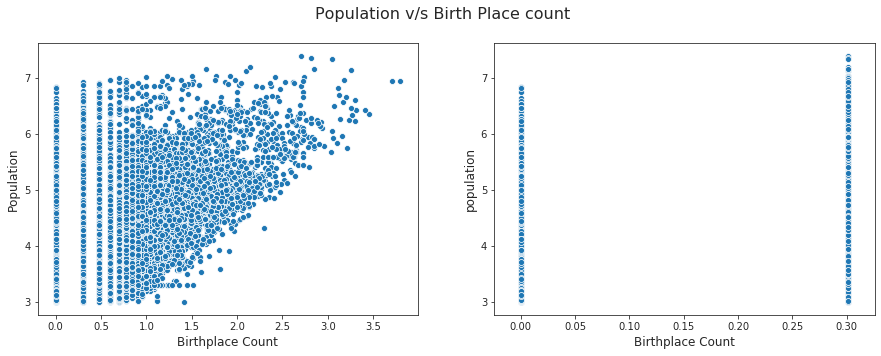

In [60]:
# It can be noted that winsorize has converted the values into 2 bins
#Setting plot styles
sns.set_style("white",{'xtick.bottom': True,'ytick.left': True})
fig, axs = plt.subplots(1,2,figsize=(15,5))
fig.suptitle("Population v/s Birth Place count", fontsize=16)

#Scatter Plot for data points
figr1 = sns.scatterplot(x='http://dbpedia.org/ontology/birthPlace?inv#count', y='population', data=winsorized_d,ax=axs[0])
figr1.axes.set_xlabel("Birthplace Count",fontsize=12)
figr1.axes.set_ylabel("Population",fontsize=12)

#Hexbin plot for datapoints
figr2 = sns.scatterplot(x='Birthcount', y='population', data=winsorized_d)
figr2.axes.set_xlabel("Birthplace Count",fontsize=12)
figr2.axes.set_ylabel("population",fontsize=12)
plt.show()

## Adding new feature (F') and then training the model(Winsorize)

In [61]:
# Setting threshold as 0.25 above which shall be one. All others shall be zero
winsorized_d["Birthcount"] = winsorized_d['Birthcount'].map(lambda x: 1 if x > 0.25 else 0)
# Adding feature to existing data
cols = winsorized_d.columns.tolist()
cols = cols[0:1]+cols[-1:] + cols[1:-1]
winsorized_d = winsorized_d[cols]
winsorized_d.head()

,name,Birthcount,rel#count,http://dbpedia.org/ontology/area#1,http://dbpedia.org/ontology/areaCode#count,http://dbpedia.org/ontology/areaLand#count,http://dbpedia.org/ontology/areaLand#1,http://dbpedia.org/ontology/areaLand#2,http://dbpedia.org/ontology/areaTotal#count,http://dbpedia.org/ontology/areaTotal#1,...,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/History_of_Hamburg>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/List_of_people_from_Bolton>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/List_of_educational_institutions>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/History_of_local_government>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/Hainan>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@OTHER,http://xmlns.com/foaf/0.1/homepage#count,http://xmlns.com/foaf/0.1/name#count,http://xmlns.com/foaf/0.1/nick#count,population
0,<http://dbpedia.org/resource/Ankara>,1,2.856124,0.0,0.30103,0.000000,0.0,0.000000e+00,0.301030,2.452100e+10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.477121,0.30103,0.30103,6.661582
1,<http://dbpedia.org/resource/Amsterdam>,1,3.358316,0.0,0.30103,0.301030,165760000.0,0.000000e+00,0.301030,2.193200e+08,...,0.0,0.0,0.0,0.0,0.0,1.0,0.301030,0.30103,0.30103,5.925489
2,<http://dbpedia.org/resource/Aarhus>,1,2.561101,0.0,0.30103,0.000000,0.0,0.000000e+00,0.000000,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.301030,0.30103,0.00000,5.422780
3,<http://dbpedia.org/resource/Adelaide>,1,2.955207,0.0,0.00000,0.000000,0.0,0.000000e+00,0.000000,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.30103,0.00000,6.119513
4,"<http://dbpedia.org/resource/Ames,_Iowa>",1,2.082785,0.0,0.00000,0.477121,62700000.0,6.270361e+07,0.477121,6.286000e+07,...,0.0,0.0,0.0,0.0,0.0,1.0,0.301030,0.30103,0.00000,4.770594


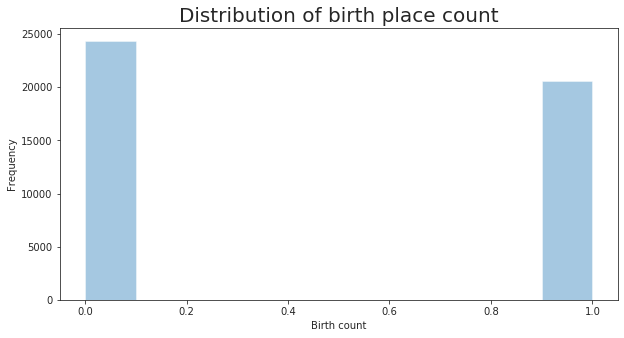

In [62]:
# Plotting histograms to check the frequency of 0's and 1's
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("white",{'xtick.bottom': True,'ytick.left': True})
fig,ax = plt.subplots(figsize=(10,5))
ax = sns.distplot(winsorized_d["Birthcount"],bins=10,kde=False, rug=False)
ax.set_title("Distribution of birth place count",fontsize=20)
ax.set(ylabel='Frequency')
ax.set(xlabel='Birth count')
plt.show();

In [63]:
# Splitting data set into train and test
train_w, test_w = train_test_split(winsorized_d, test_size=0.2, random_state=1)
X_train_w, y_train_w = train_w.iloc[:, 1:-1], train_w.iloc[:, -1]
X_test_w, y_test_w = test_w.iloc[:, 1:-1], test_w.iloc[:, -1]
feature_names = list(X_train_w)
# Scaling values using minmax scaler
scaler = MinMaxScaler()
X_train_w = pd.DataFrame(data=scaler.fit_transform(X_train_w), columns=feature_names)
X_test_w = pd.DataFrame(data=scaler.transform(X_test_w), columns=feature_names)
X_train_w.head()

,Birthcount,rel#count,http://dbpedia.org/ontology/area#1,http://dbpedia.org/ontology/areaCode#count,http://dbpedia.org/ontology/areaLand#count,http://dbpedia.org/ontology/areaLand#1,http://dbpedia.org/ontology/areaLand#2,http://dbpedia.org/ontology/areaTotal#count,http://dbpedia.org/ontology/areaTotal#1,http://dbpedia.org/ontology/areaWater#count,...,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/Egypt>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/History_of_Hamburg>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/List_of_people_from_Bolton>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/List_of_educational_institutions>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/History_of_local_government>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/Hainan>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@OTHER,http://xmlns.com/foaf/0.1/homepage#count,http://xmlns.com/foaf/0.1/name#count,http://xmlns.com/foaf/0.1/nick#count
0,0.0,0.179092,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.430677,0.386853,0.0
1,1.0,0.208287,0.001720,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.386853,0.0
2,0.0,0.167368,0.000000,0.0,0.0,0.0,0.0,0.63093,0.000157,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.386853,0.0
3,0.0,0.101962,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.386853,0.0
4,0.0,0.199380,0.000471,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.386853,0.0


In [65]:
# Doing a random forest model and then print the R2 score for training, validaton and oob sets
rf_trans = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
rf_trans.fit(X_train_w, y_train_w)

print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f}  \nR^2 Validation Score: {:.2f}'.format(rf_trans.score(X_train_w, y_train_w), 
                                                                                             rf_trans.oob_score_,
                                                                                             rf_trans.score(X_test_w, y_test_w)))
y_pred_w = rf_trans.predict(X_test_w)
print('Mean Sqaured Error:', mean_squared_error(y_test_w, y_pred_w))
print('Root Mean Sqaured Error:', np.sqrt(mean_squared_error(y_test_w, y_pred_w)))

R^2 Training Score: 0.96 
OOB Score: 0.79  
R^2 Validation Score: 0.80
Mean Sqaured Error: 0.09501152194533939
Root Mean Sqaured Error: 0.30823939064522465


## Replace F with F' and then train the model(Winsorize method)

In [66]:
winsorized_d = winsorized_d.drop('http://dbpedia.org/ontology/birthPlace?inv#count', 1)

In [67]:
# Splitting data set into train and test
train_w, test_w = train_test_split(winsorized_d, test_size=0.2, random_state=1)
X_train_w, y_train_w = train_w.iloc[:, 1:-1], train_w.iloc[:, -1]
X_test_w, y_test_w = test_w.iloc[:, 1:-1], test_w.iloc[:, -1]
feature_names = list(X_train_w)
# Scaling values using minmax scaler
scaler = MinMaxScaler()
X_train_w = pd.DataFrame(data=scaler.fit_transform(X_train_w), columns=feature_names)
X_test_w = pd.DataFrame(data=scaler.transform(X_test_w), columns=feature_names)
X_train_w.head()

,Birthcount,rel#count,http://dbpedia.org/ontology/area#1,http://dbpedia.org/ontology/areaCode#count,http://dbpedia.org/ontology/areaLand#count,http://dbpedia.org/ontology/areaLand#1,http://dbpedia.org/ontology/areaLand#2,http://dbpedia.org/ontology/areaTotal#count,http://dbpedia.org/ontology/areaTotal#1,http://dbpedia.org/ontology/areaWater#count,...,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/Egypt>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/History_of_Hamburg>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/List_of_people_from_Bolton>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/List_of_educational_institutions>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/History_of_local_government>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/Hainan>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@OTHER,http://xmlns.com/foaf/0.1/homepage#count,http://xmlns.com/foaf/0.1/name#count,http://xmlns.com/foaf/0.1/nick#count
0,0.0,0.179092,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.430677,0.386853,0.0
1,1.0,0.208287,0.001720,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.386853,0.0
2,0.0,0.167368,0.000000,0.0,0.0,0.0,0.0,0.63093,0.000157,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.386853,0.0
3,0.0,0.101962,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.386853,0.0
4,0.0,0.199380,0.000471,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.386853,0.0


In [68]:
# Doing a random forest model and then print the R2 score for training, validaton and oob sets
rf_trans = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
rf_trans.fit(X_train_w, y_train_w)

print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f}  \nR^2 Validation Score: {:.2f}'.format(rf_trans.score(X_train_w, y_train_w), 
                                                                                             rf_trans.oob_score_,
                                                                                             rf_trans.score(X_test_w, y_test_w)))
y_pred_w = rf_trans.predict(X_test_w)
print('Mean Sqaured Error:', mean_squared_error(y_test_w, y_pred_w))
print('Root Mean Sqaured Error:', np.sqrt(mean_squared_error(y_test_w, y_pred_w)))

R^2 Training Score: 0.96 
OOB Score: 0.78  
R^2 Validation Score: 0.80
Mean Sqaured Error: 0.09639656313103266
Root Mean Sqaured Error: 0.3104779591710701


## Thresholding Process using Adaptive Binning Method

In [69]:
# Finding the two bins using adaptive binning method. All other quantiles
qntls = [.75, 1.]
qntls = dbpedia['http://dbpedia.org/ontology/birthPlace?inv#count'].quantile(quantile_list)
qntls

0.75    0.477121
1.00    3.796505
Name: http://dbpedia.org/ontology/birthPlace?inv#count, dtype: float64

In [71]:
# Setting the threshold based on quantile
adap_df = dbpedia.copy()
# Setting threshold as 0.25 above which shall be one. All others shall be zero
adap_df["Birthcount"] = adap_df['http://dbpedia.org/ontology/birthPlace?inv#count'].map(lambda x: 1 if x > 0.47 else 0)
# Adding feature to existing data
cols = adap_df.columns.tolist()
cols = cols[0:1]+cols[-1:] + cols[1:-1]
adap_df = adap_df[cols]

In [72]:
# Splitting data set into train and test
train_a, test_a = train_test_split(adap_df, test_size=0.2, random_state=1)
X_train_a, y_train_a = train_a.iloc[:, 1:-1], train_a.iloc[:, -1]
X_test_a, y_test_a = test_a.iloc[:, 1:-1], test_a.iloc[:, -1]
feature_names = list(X_train_a)
# Scaling values using minmax scaler
scaler = MinMaxScaler()
X_train_a = pd.DataFrame(data=scaler.fit_transform(X_train_a), columns=feature_names)
X_test_a = pd.DataFrame(data=scaler.transform(X_test_a), columns=feature_names)
X_train_a.head()

,Birthcount,rel#count,http://dbpedia.org/ontology/area#1,http://dbpedia.org/ontology/areaCode#count,http://dbpedia.org/ontology/areaLand#count,http://dbpedia.org/ontology/areaLand#1,http://dbpedia.org/ontology/areaLand#2,http://dbpedia.org/ontology/areaTotal#count,http://dbpedia.org/ontology/areaTotal#1,http://dbpedia.org/ontology/areaWater#count,...,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/Egypt>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/History_of_Hamburg>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/List_of_people_from_Bolton>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/List_of_educational_institutions>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/History_of_local_government>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/Hainan>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@OTHER,http://xmlns.com/foaf/0.1/homepage#count,http://xmlns.com/foaf/0.1/name#count,http://xmlns.com/foaf/0.1/nick#count
0,0.0,0.179092,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.430677,0.386853,0.0
1,0.0,0.208287,0.001720,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.386853,0.0
2,0.0,0.167368,0.000000,0.0,0.0,0.0,0.0,0.63093,0.000157,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.386853,0.0
3,0.0,0.101962,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.386853,0.0
4,0.0,0.199380,0.000471,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.386853,0.0


In [73]:
# Doing a random forest model and then print the R2 score for training, validaton and oob sets
rf_adapt = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
rf_adapt.fit(X_train_a, y_train_a)

print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f}  \nR^2 Validation Score: {:.2f}'.format(rf_adapt.score(X_train_a, y_train_a), 
                                                                                             rf_adapt.oob_score_,
                                                                                             rf_adapt.score(X_test_a, y_test_a)))
y_pred_a = rf_adapt.predict(X_test_a)
print('Mean Sqaured Error:', mean_squared_error(y_test_a, y_pred_a))
print('Root Mean Sqaured Error:', np.sqrt(mean_squared_error(y_test_a, y_pred_a)))

R^2 Training Score: 0.96 
OOB Score: 0.79  
R^2 Validation Score: 0.80
Mean Sqaured Error: 0.09508209105004455
Root Mean Sqaured Error: 0.30835384066044086


## Replace F with F' and then train the model(Adaptive Binning method)

In [74]:
X_train_a = X_train_a.drop('http://dbpedia.org/ontology/birthPlace?inv#count', 1)
X_test_a = X_test_a.drop('http://dbpedia.org/ontology/birthPlace?inv#count', 1)

In [75]:
# Doing a random forest model and then print the R2 score for training, validaton and oob sets
rf_adapt = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
rf_adapt.fit(X_train_a, y_train_a)

print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f}  \nR^2 Validation Score: {:.2f}'.format(rf_adapt.score(X_train_a, y_train_a), 
                                                                                             rf_adapt.oob_score_,
                                                                                             rf_adapt.score(X_test_a, y_test_a)))
y_pred_a = rf_adapt.predict(X_test_a)
print('Mean Sqaured Error:', mean_squared_error(y_test_a, y_pred_a))
print('Root Mean Sqaured Error:', np.sqrt(mean_squared_error(y_test_a, y_pred_a)))

R^2 Training Score: 0.96 
OOB Score: 0.78  
R^2 Validation Score: 0.80
Mean Sqaured Error: 0.09466302147542625
Root Mean Sqaured Error: 0.30767356317276634
